In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-times-articles-comments-2020/nyt-comments-part3.csv
/kaggle/input/new-york-times-articles-comments-2020/nyt-comments-part0.csv
/kaggle/input/new-york-times-articles-comments-2020/nyt-comments-part5.csv
/kaggle/input/new-york-times-articles-comments-2020/nyt-comments-part9.csv
/kaggle/input/new-york-times-articles-comments-2020/nyt-comments-part1.csv
/kaggle/input/new-york-times-articles-comments-2020/nyt-comments-part4.csv
/kaggle/input/new-york-times-articles-comments-2020/nyt-articles-2020.csv
/kaggle/input/new-york-times-articles-comments-2020/nyt-comments-2020.csv
/kaggle/input/new-york-times-articles-comments-2020/train.csv
/kaggle/input/new-york-times-articles-comments-2020/nyt-comments-part7.csv
/kaggle/input/new-york-times-articles-comments-2020/nyt-comments-part2.csv
/kaggle/input/new-york-times-articles-comments-2020/test.csv
/kaggle/input/new-york-times-articles-comments-2020/nyt-comments-part8.csv
/kaggle/input/new-york-times-articles-comments-2020/ny

In [34]:
article_data = pd.read_csv("/kaggle/input/new-york-times-articles-comments-2020/nyt-articles-2020.csv")
article_data.head()

,newsdesk,section,subsection,material,headline,abstract,keywords,word_count,pub_date,n_comments,uniqueID
0,Editorial,Opinion,NaN,Editorial,Protect Veterans From Fraud,Congress could do much more to protect America...,"['Veterans', 'For-Profit Schools', 'Financial ...",680,2020-01-01 00:18:54+00:00,186,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...
1,Games,Crosswords & Games,NaN,News,‘It’s Green and Slimy’,Christina Iverson and Jeff Chen ring in the Ne...,['Crossword Puzzles'],931,2020-01-01 03:00:10+00:00,257,nyt://article/9edddb54-0aa3-5835-a833-d311a76f...
2,Science,Science,NaN,News,Meteor Showers in 2020 That Will Light Up Nigh...,"All year long, Earth passes through streams of...","['Meteors and Meteorites', 'Space and Astronom...",1057,2020-01-01 05:00:08+00:00,6,nyt://article/04bc90f0-b20b-511c-b5bb-3ce13194...
3,Science,Science,NaN,Interactive Feature,Sync your calendar with the solar system,"Never miss an eclipse, a meteor shower, a rock...","['Space and Astronomy', 'Moon', 'Eclipses', 'S...",0,2020-01-01 05:00:12+00:00,2,nyt://interactive/5b58d876-9351-50af-9b41-a312...
4,Science,Science,NaN,News,"Rocket Launches, Trips to Mars and More 2020 S...",A year full of highs and lows in space just en...,"['Space and Astronomy', 'Private Spaceflight',...",1156,2020-01-01 05:02:38+00:00,25,nyt://article/bd8647b3-8ec6-50aa-95cf-2b81ed12...


In [35]:
import matplotlib.pyplot as plt
article_data["word_count"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16787 entries, 0 to 16786
Series name: word_count
Non-Null Count  Dtype
--------------  -----
16787 non-null  int64
dtypes: int64(1)
memory usage: 131.3 KB


In [36]:
article_data["n_comments"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16787 entries, 0 to 16786
Series name: n_comments
Non-Null Count  Dtype
--------------  -----
16787 non-null  int64
dtypes: int64(1)
memory usage: 131.3 KB


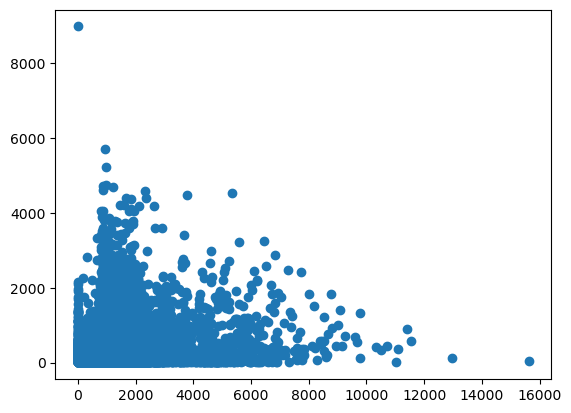

In [37]:
plt.scatter(x=article_data["word_count"], y=article_data["n_comments"])
plt.show()

(array([1.156e+03, 1.119e+03, 2.843e+03, 4.264e+03, 3.743e+03, 1.830e+03,
        5.870e+02, 3.130e+02, 1.890e+02, 1.400e+02, 8.300e+01, 7.700e+01,
        4.500e+01, 4.800e+01, 6.100e+01, 4.300e+01, 3.700e+01, 2.900e+01,
        3.800e+01, 2.900e+01, 2.600e+01, 1.900e+01, 1.200e+01, 6.000e+00,
        1.200e+01, 5.000e+00, 5.000e+00, 8.000e+00, 4.000e+00, 3.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([    0.  ,   312.38,   624.76,   937.14,  1249.52,  1561.9 ,
         1874.28,  2186.66,  2499.04,  2811.42,  3123.8 ,  3436.18,
         3748.56,  4060.94,  4373.32,  4685.7 ,  4998.08,  5310.46,
         5622.84,  5935.22,  6247.6 ,  6559.98,  6872.36,  7184.74,
         7497.12,  7809.5 ,  8121.88,  8434.26,  8746.64,  9059.02,
         9371.4 ,  9683.78,  9996.16

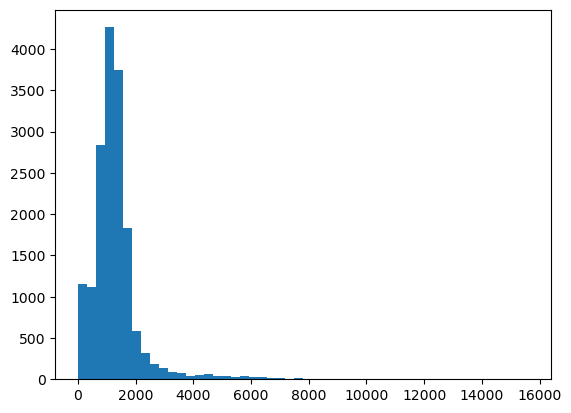

In [38]:
plt.hist(article_data["word_count"], bins=50)

(array([1.0541e+04, 2.3910e+03, 1.1350e+03, 6.4900e+02, 4.8100e+02,
        3.4900e+02, 2.9200e+02, 1.8500e+02, 1.7400e+02, 1.2400e+02,
        1.2900e+02, 8.9000e+01, 5.6000e+01, 4.3000e+01, 3.5000e+01,
        2.2000e+01, 1.6000e+01, 1.8000e+01, 1.1000e+01, 1.3000e+01,
        6.0000e+00, 6.0000e+00, 5.0000e+00, 4.0000e+00, 4.0000e+00,
        3.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 1.80720e+02, 3.60440e+02, 5.40160e+02, 7.19880e+02,
        8.99600e+02, 1.07932e+03, 1.25904e+03, 1.43876e+03, 1.61848e+03,
        1.79820e+03, 1.97792e+03, 2.15764e+03, 2.33736e+03, 2.51708e+03,
        2.69680e+03, 2.87652e+03, 3.05624e+03, 3.23596e+03, 3.41568e+03,
        3.59540e+03, 3.775

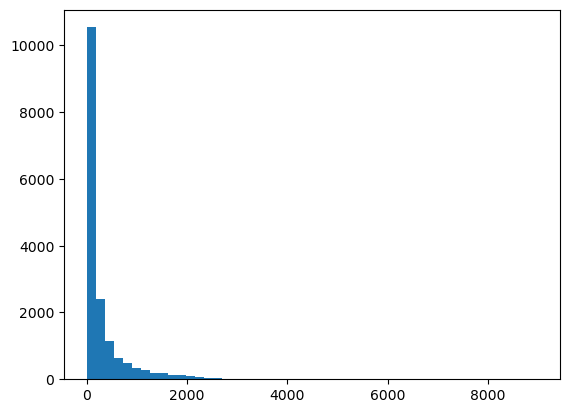

In [39]:
plt.hist(article_data["n_comments"], bins=50)

(array([292.,   0., 295.,   0., 281., 247., 281., 252., 476., 205., 377.,
        560., 301., 596., 371., 553., 461., 574., 446., 520., 518., 494.,
        530., 483., 487., 509., 557., 567., 581., 624., 543., 496., 455.,
        401., 383., 351., 350., 321., 256., 231., 224., 146.,  92.,  43.,
         34.,  15.,   6.,   1.,   0.,   1.]),
 array([0.69314718, 0.86135715, 1.02956712, 1.19777709, 1.36598706,
        1.53419703, 1.70240699, 1.87061696, 2.03882693, 2.2070369 ,
        2.37524687, 2.54345684, 2.71166681, 2.87987678, 3.04808675,
        3.21629672, 3.38450669, 3.55271665, 3.72092662, 3.88913659,
        4.05734656, 4.22555653, 4.3937665 , 4.56197647, 4.73018644,
        4.89839641, 5.06660638, 5.23481635, 5.40302631, 5.57123628,
        5.73944625, 5.90765622, 6.07586619, 6.24407616, 6.41228613,
        6.5804961 , 6.74870607, 6.91691604, 7.085126  , 7.25333597,
        7.42154594, 7.58975591, 7.75796588, 7.92617585, 8.09438582,
        8.26259579, 8.43080576, 8.59901573, 8.

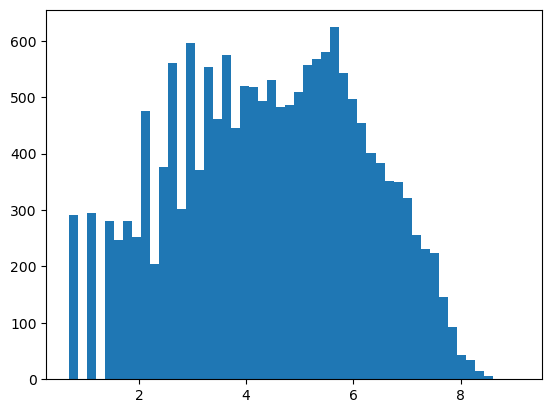

In [40]:
plt.hist(np.log(article_data["n_comments"] + 1), bins=50)

(array([4.510e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 9.000e+00, 2.400e+01, 2.600e+01,
        4.100e+01, 9.200e+01, 5.800e+01, 8.500e+01, 1.920e+02, 2.180e+02,
        2.350e+02, 2.810e+02, 3.750e+02, 6.370e+02, 1.256e+03, 2.398e+03,
        3.239e+03, 3.286e+03, 2.004e+03, 7.030e+02, 3.800e+02, 2.370e+02,
        1.470e+02, 1.450e+02, 1.160e+02, 8.400e+01, 3.600e+01, 1.300e+01,
        5.000e+00, 2.000e+00]),
 array([0.        , 0.19312615, 0.3862523 , 0.57937845, 0.77250459,
        0.96563074, 1.15875689, 1.35188304, 1.54500919, 1.73813534,
        1.93126148, 2.12438763, 2.31751378, 2.51063993, 2.70376608,
        2.89689223, 3.09001838, 3.28314452, 3.47627067, 3.66939682,
        3.86252297, 4.05564912, 4.24877527, 4.44190141, 4.63502756,
        4.82815371, 5.02127986, 5.21

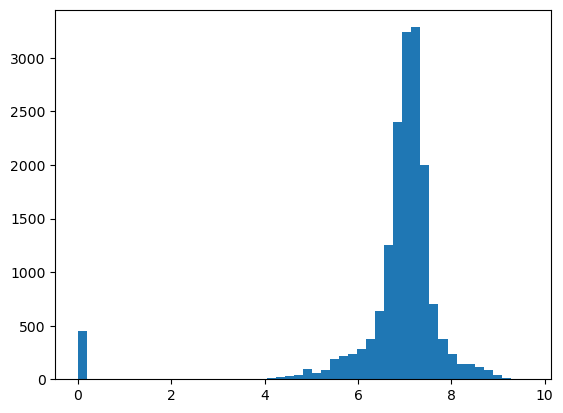

In [41]:
plt.hist(np.log(article_data["word_count"]+ 1), bins=50)

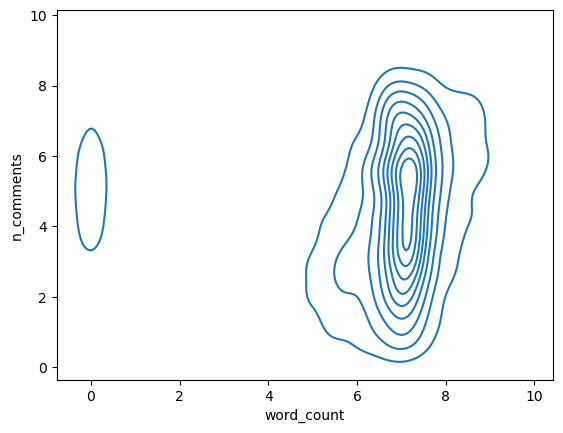

In [42]:
import seaborn as sns
sns.kdeplot(x = np.log(article_data["word_count"]+ 1), y = np.log(article_data["n_comments"] + 1))
plt.show()

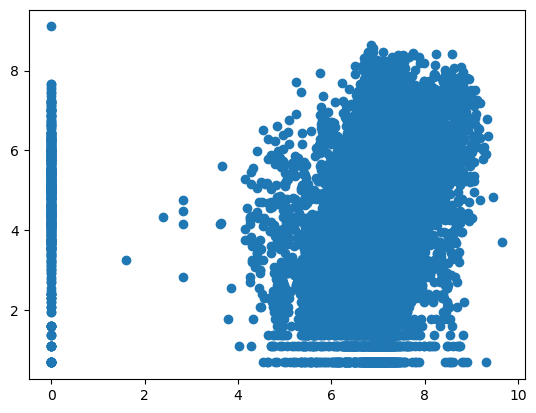

In [43]:
plt.scatter(x = np.log(article_data["word_count"]+ 1), y = np.log(article_data["n_comments"] + 1))

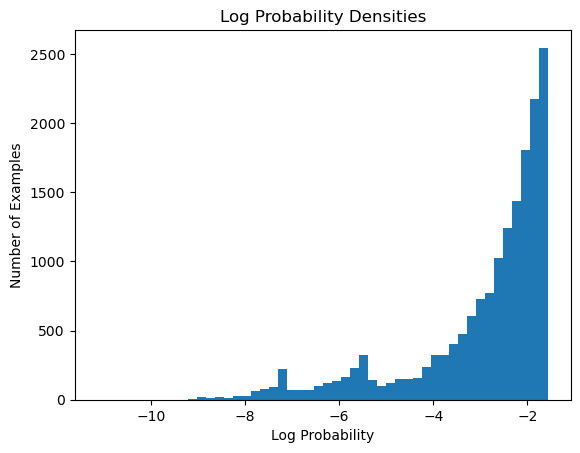

In [44]:
from sklearn.mixture import GaussianMixture

X = pd.concat([np.log(article_data["word_count"] + 1), np.log(article_data["n_comments"] + 1)], axis=1)

gmm = GaussianMixture(n_components=2)
gmm.fit(X)

# Compute the log probability density for each point in the dataset
log_prob = gmm.score_samples(X)
X["log_prob"] = log_prob

# Let's plot the densities to visualize the threshold for anomalies
plt.hist(log_prob, bins=50)
plt.title("Log Probability Densities")
plt.xlabel("Log Probability")
plt.ylabel("Number of Examples")
plt.show()


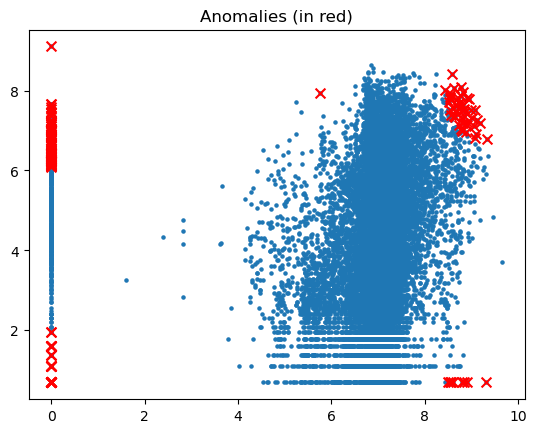

In [45]:
threshold = np.percentile(log_prob, 1)

# Points below the threshold are anomalies
anomalies = X[log_prob < threshold]

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=5)
plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1], color='red', s=50, marker='x')
plt.title("Anomalies (in red)")
plt.show()


In [46]:
X.head()

,word_count,n_comments,log_prob
0,6.523562,5.231109,-2.856100
1,6.837333,5.552960,-2.053530
2,6.964136,1.945910,-2.622046
3,0.000000,1.098612,-8.521654
4,7.053586,3.258097,-1.810760


In [48]:
X.columns = ["log_word_count","log_n_comments", "log_prob"]

In [49]:
X.head()

,log_word_count,log_n_comments,log_prob
0,6.523562,5.231109,-2.856100
1,6.837333,5.552960,-2.053530
2,6.964136,1.945910,-2.622046
3,0.000000,1.098612,-8.521654
4,7.053586,3.258097,-1.810760


In [50]:
nyt_data = article_data.join(X, how='inner')
nyt_data.head()


,newsdesk,section,subsection,material,headline,abstract,keywords,word_count,pub_date,n_comments,uniqueID,log_word_count,log_n_comments,log_prob
0,Editorial,Opinion,NaN,Editorial,Protect Veterans From Fraud,Congress could do much more to protect America...,"['Veterans', 'For-Profit Schools', 'Financial ...",680,2020-01-01 00:18:54+00:00,186,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...,6.523562,5.231109,-2.856100
1,Games,Crosswords & Games,NaN,News,‘It’s Green and Slimy’,Christina Iverson and Jeff Chen ring in the Ne...,['Crossword Puzzles'],931,2020-01-01 03:00:10+00:00,257,nyt://article/9edddb54-0aa3-5835-a833-d311a76f...,6.837333,5.552960,-2.053530
2,Science,Science,NaN,News,Meteor Showers in 2020 That Will Light Up Nigh...,"All year long, Earth passes through streams of...","['Meteors and Meteorites', 'Space and Astronom...",1057,2020-01-01 05:00:08+00:00,6,nyt://article/04bc90f0-b20b-511c-b5bb-3ce13194...,6.964136,1.945910,-2.622046
3,Science,Science,NaN,Interactive Feature,Sync your calendar with the solar system,"Never miss an eclipse, a meteor shower, a rock...","['Space and Astronomy', 'Moon', 'Eclipses', 'S...",0,2020-01-01 05:00:12+00:00,2,nyt://interactive/5b58d876-9351-50af-9b41-a312...,0.000000,1.098612,-8.521654
4,Science,Science,NaN,News,"Rocket Launches, Trips to Mars and More 2020 S...",A year full of highs and lows in space just en...,"['Space and Astronomy', 'Private Spaceflight',...",1156,2020-01-01 05:02:38+00:00,25,nyt://article/bd8647b3-8ec6-50aa-95cf-2b81ed12...,7.053586,3.258097,-1.810760


In [52]:
nyt_data_anomalies = nyt_data[log_prob < threshold]
nyt_data_anomalies

,newsdesk,section,subsection,material,headline,abstract,keywords,word_count,pub_date,n_comments,uniqueID,log_word_count,log_n_comments,log_prob
3,Science,Science,NaN,Interactive Feature,Sync your calendar with the solar system,"Never miss an eclipse, a meteor shower, a rock...","['Space and Astronomy', 'Moon', 'Eclipses', 'S...",0,2020-01-01 05:00:12+00:00,2,nyt://interactive/5b58d876-9351-50af-9b41-a312...,0.000000,1.098612,-8.521654
80,Opinion,Opinion,Sunday Review,Interactive Feature,The Countdown,Did the uncertainty of death — when and how it...,"['Surveillance of Citizens by Government', 'Pr...",0,2020-01-03 10:00:03+00:00,2,nyt://interactive/645445df-a91d-56bd-afbd-c442...,0.000000,1.098612,-8.521654
458,Washington,U.S.,Politics,News,Seven Days in January: How Trump Pushed U.S. a...,"The story of that week, and the secret plannin...","['Iran', 'United States Defense and Military F...",5222,2020-01-11 18:28:16+00:00,1612,nyt://article/07159218-b947-505e-a984-f23a123f...,8.560827,7.385851,-7.768223
467,U.S.,U.S.,NaN,Interactive Feature,Two States. Eight Textbooks. Two American Stor...,We analyzed some of the most popular social st...,"['Textbooks', 'Politics and Government', 'Hist...",0,2020-01-12 10:00:01+00:00,595,nyt://interactive/9b9c0351-7c80-5938-a808-3c70...,0.000000,6.390241,-7.960065
492,Opinion,Opinion,NaN,Interactive Feature,The Choice,Nine candidates. Fifteen New York Times journa...,"['Presidential Election of 2020', 'Democratic ...",0,2020-01-13 10:00:01+00:00,506,nyt://interactive/13cb9d8e-bb59-56f5-ab3b-96d0...,0.000000,6.228511,-7.844947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16512,Magazine,Magazine,NaN,Interactive Feature,Stanley Crouch Was a Critic Who Didn’t Hold Ba...,"He was an intellectual, a holder of court, a j...","['Jazz', 'New York City', 'Crouch, Stanley', '...",0,2020-12-23 10:36:53+00:00,1,nyt://interactive/ea969cd1-b720-5a05-a8b5-2eab...,0.000000,0.693147,-8.932991
16514,Magazine,Magazine,NaN,Interactive Feature,James Harvey Celebrated the Pleasure of a Pack...,"No one was more passionate about the cinema, o...","['Movies', 'Harvey, James (1929-2020)', 'Writi...",0,2020-12-23 10:39:19+00:00,1,nyt://interactive/d79bf14b-be35-58ba-a19e-5867...,0.000000,0.693147,-8.932991
16532,Books,Books,NaN,Interactive Feature,Globetrotting,Your sneak preview of books coming out in 2021...,"['Books and Literature', 'Writing and Writers'...",0,2020-12-23 22:14:28+00:00,3,nyt://interactive/1b440237-2841-530e-805f-cbda...,0.000000,1.386294,-8.261599
16559,Magazine,Magazine,NaN,News,People Are Dying. Whom Do We Save First With t...,"With limited doses available, and a pandemic c...","['Vaccination and Immunization', 'Coronavirus ...",6586,2020-12-24 10:00:28+00:00,1091,nyt://article/6a07664e-30af-5b06-851d-9e811c4a...,8.792853,6.995766,-7.754386


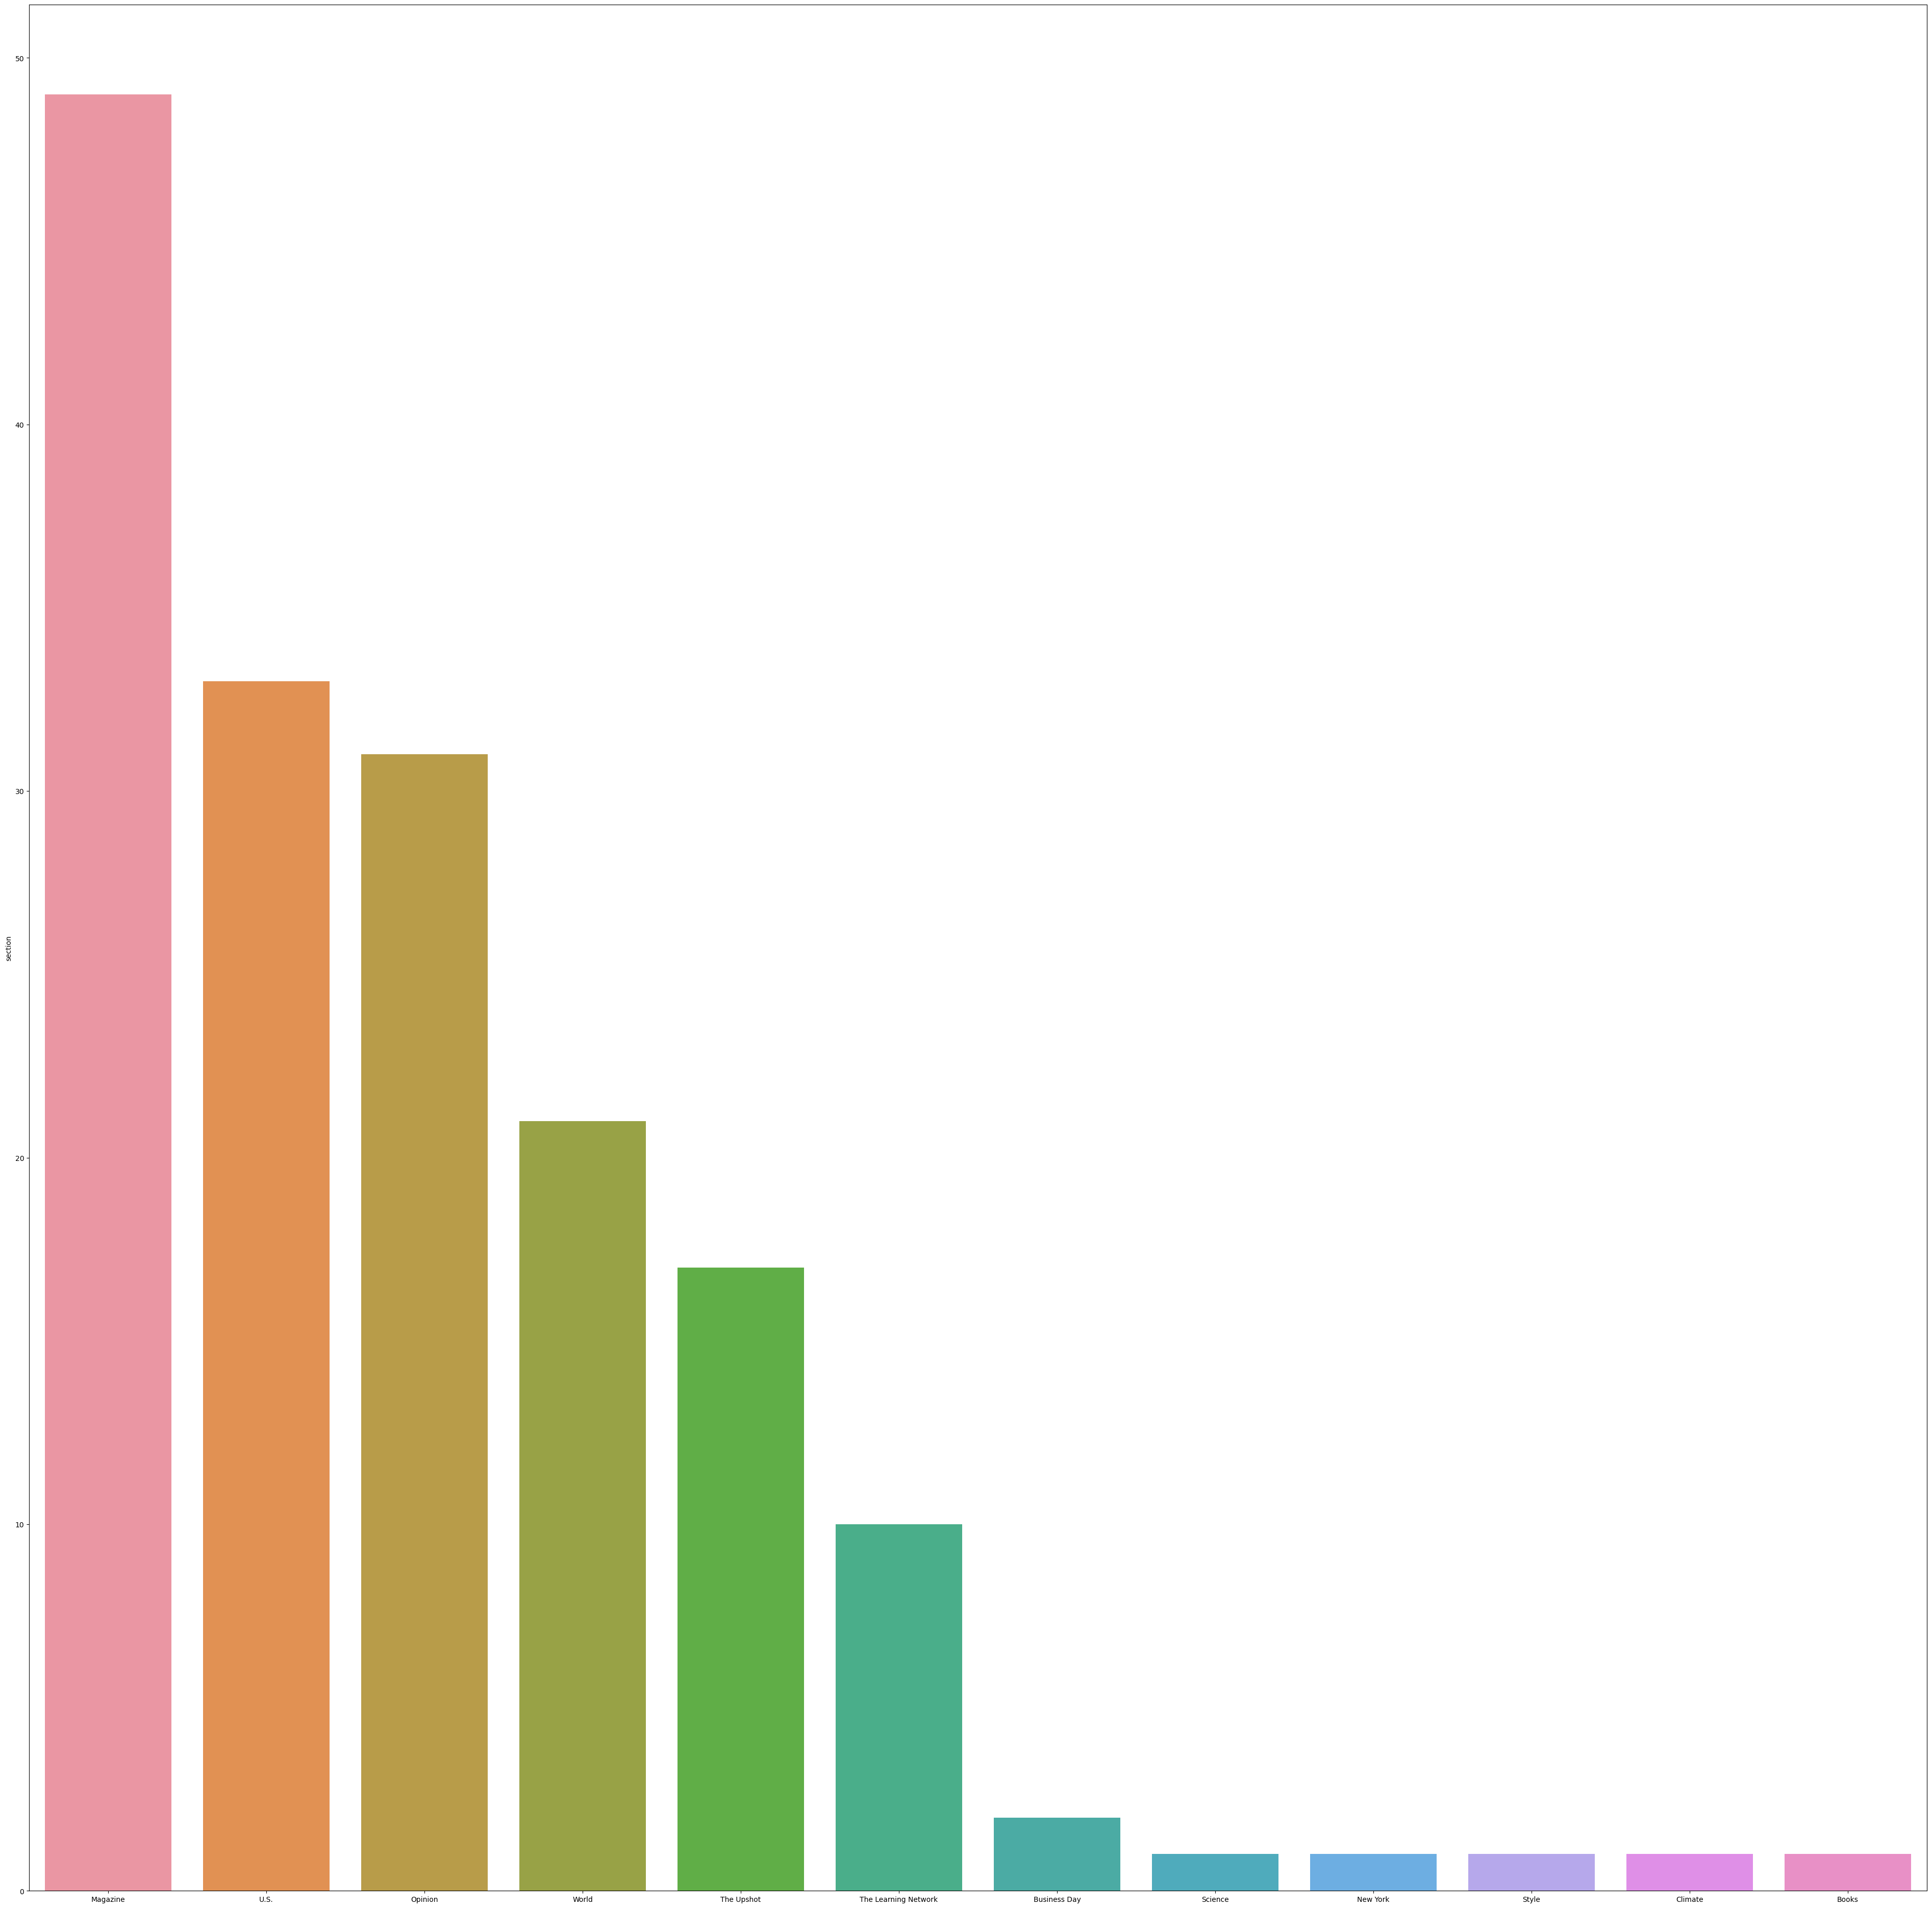

In [59]:
plt.figure(figsize = (48, 48))
section_counts = nyt_data_anomalies["section"].value_counts()
sns.barplot(x = section_counts.index, y = section_counts)
plt.show()

In [62]:
culturally_significant = nyt_data_anomalies[(nyt_data_anomalies["log_word_count"] > 7) & (nyt_data_anomalies["log_n_comments"] > 6)]
culturally_significant

,newsdesk,section,subsection,material,headline,abstract,keywords,word_count,pub_date,n_comments,uniqueID,log_word_count,log_n_comments,log_prob
458,Washington,U.S.,Politics,News,Seven Days in January: How Trump Pushed U.S. a...,"The story of that week, and the secret plannin...","['Iran', 'United States Defense and Military F...",5222,2020-01-11 18:28:16+00:00,1612,nyt://article/07159218-b947-505e-a984-f23a123f...,8.560827,7.385851,-7.768223
2647,Magazine,Magazine,NaN,News,How Will Trump’s Supreme Court Remake America?,"On abortion, gun rights and more, the future c...","['Supreme Court (US)', 'Constitution (US)', 'C...",7343,2020-02-27 10:00:37+00:00,1354,nyt://article/f0d1bea3-5a35-5a47-ae52-aacc52fa...,8.901639,7.211557,-8.045258
2916,Magazine,Magazine,NaN,News,A $60 Billion Housing Grab by Wall Street,Hundreds of thousands of single-family homes a...,"['Real Estate and Housing (Residential)', 'Pri...",8801,2020-03-04 10:00:05+00:00,919,nyt://article/8dcb3c24-c5cc-5e96-9a0a-23416957...,9.082734,6.824374,-7.757436
3482,Magazine,Magazine,NaN,News,Did America Misjudge Bernie Sanders? Or Did He...,"Throughout his insurgent campaign, he remained...","['Sanders, Bernard', 'Presidential Election of...",6846,2020-03-16 09:00:08+00:00,1590,nyt://article/1cfc0ee7-f298-58e4-8af2-370a275d...,8.831566,7.372118,-8.170386
3631,Magazine,Magazine,NaN,News,The Accusations Were Lies. But Could We Prove It?,When the university told my wife about the sex...,"['Colleges and Universities', 'Cyberharassment...",9002,2020-03-18 09:00:06+00:00,999,nyt://article/8577a739-01d7-5c89-bc98-746f2297...,9.105313,6.907755,-7.847694
4259,Foreign,World,NaN,News,"As Governors Plead for Tests, Trump Promises V...","Maryland, Virginia and Arizona issued statewid...","['Coronavirus (2019-nCoV)', 'Fauci, Anthony S'...",7746,2020-03-30 04:04:07+00:00,2420,nyt://article/9d0e9175-3961-51b8-941e-af44f9b9...,8.955061,7.791936,-8.739254
4332,Foreign,World,NaN,News,White House Projects Grim Toll From Coronavirus,The scientists leading the administration’s fi...,"['Coronavirus (2019-nCoV)', 'Trump, Donald J',...",6214,2020-03-31 04:04:04+00:00,2170,nyt://article/e8f527cf-37d0-50d4-9e10-e5ef00ff...,8.734721,7.682943,-8.425060
4402,Foreign,World,NaN,News,"Coronavirus Spreads Amid Supply Shortages, Sta...",Florida’s governor belatedly directed resident...,"['Coronavirus (2019-nCoV)', 'Trump, Donald J',...",7034,2020-04-01 04:04:49+00:00,1763,nyt://article/1374746f-d848-559a-97e5-258440a3...,8.858653,7.475339,-8.304204
4483,Foreign,World,NaN,News,White House Debates How Far to Go on Face Mask...,The coordinator of the coronavirus response em...,['Coronavirus (2019-nCoV)'],9075,2020-04-02 04:02:53+00:00,1416,nyt://article/449eb6cf-679b-570a-9623-de16404b...,9.113389,7.256297,-8.205668
4563,Foreign,World,NaN,News,C.D.C. Recommends Wearing Masks in Public; Tru...,Alabama became the 41st state to issue a stay-...,['Coronavirus (2019-nCoV)'],6944,2020-04-03 04:21:05+00:00,1856,nyt://article/3ae2b557-6801-5050-9cdc-b517724f...,8.845777,7.526718,-8.353076


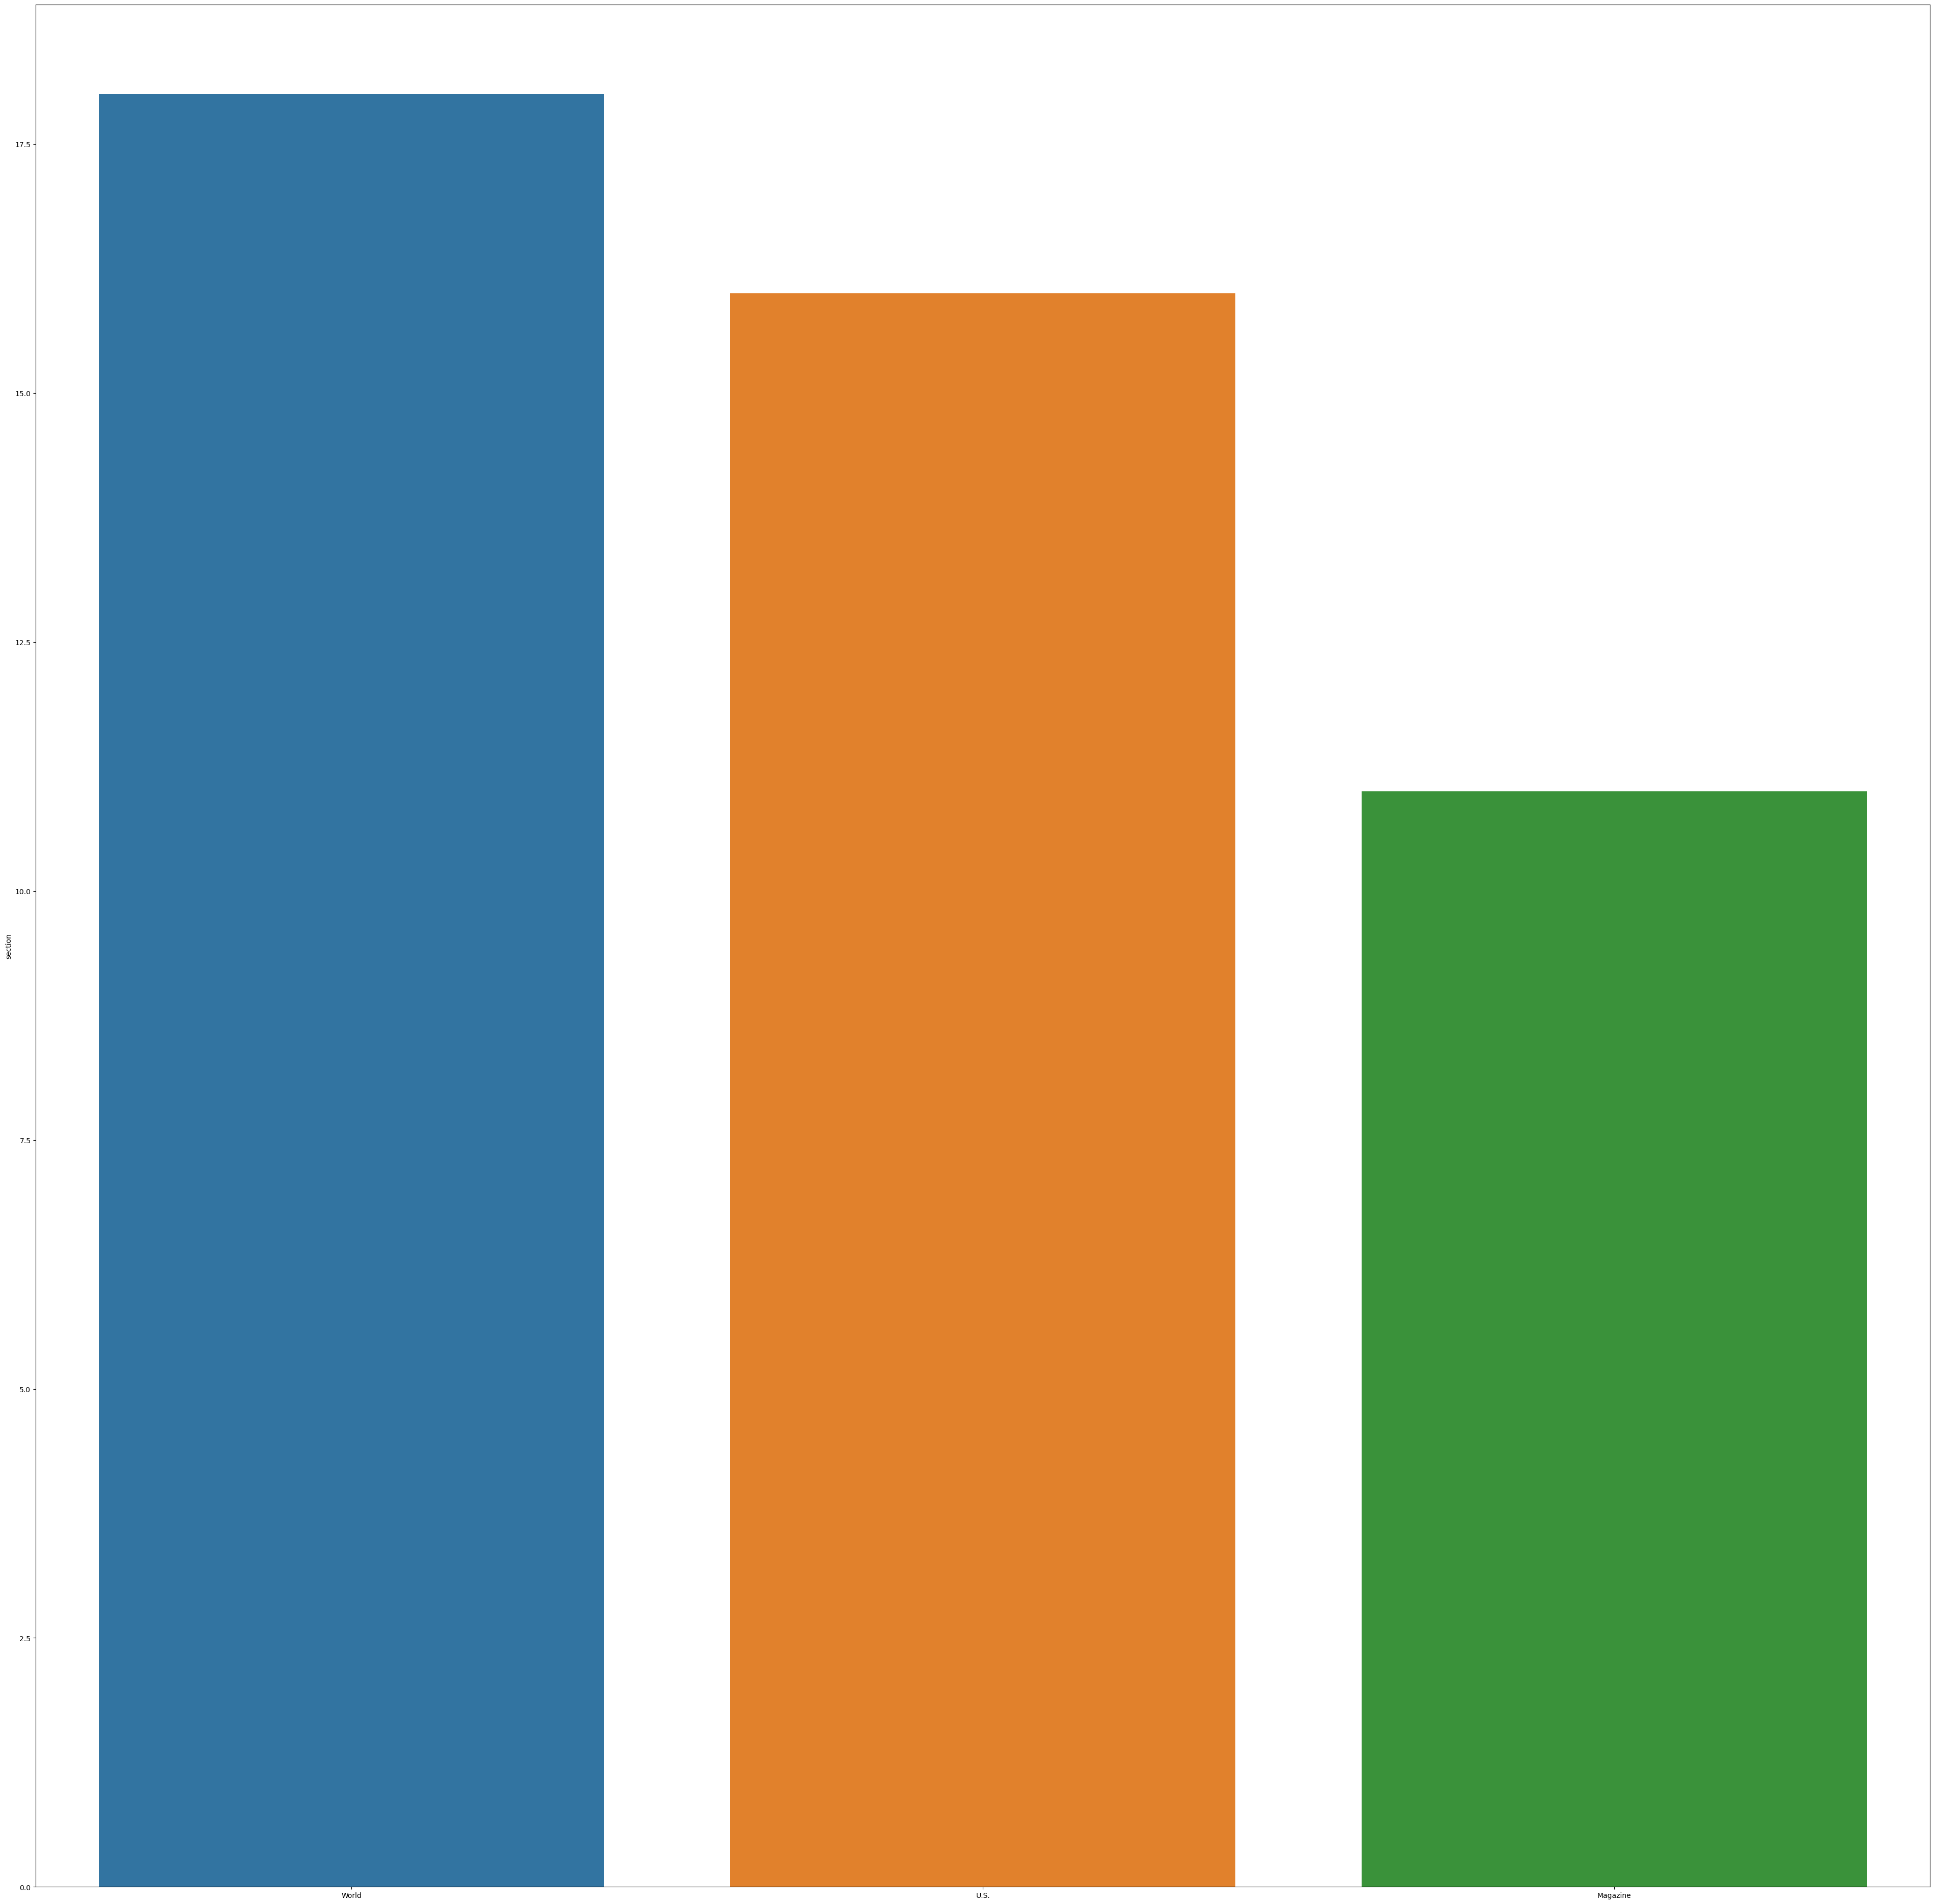

In [63]:
plt.figure(figsize = (48, 48))
cultural_significance_section_counts = culturally_significant["section"].value_counts()
sns.barplot(x = cultural_significance_section_counts.index, y = cultural_significance_section_counts)
plt.show()

In [74]:
# Convert each row's list of keywords to a space-separated string
culturally_significant['keyword_text'] = culturally_significant['keywords'].apply(''.join)

# Combine all rows to form a single string
text = ' '.join(culturally_significant['keyword_text'])


/tmp/ipykernel_33/3839284049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  culturally_significant['keyword_text'] = culturally_significant['keywords'].apply(''.join)


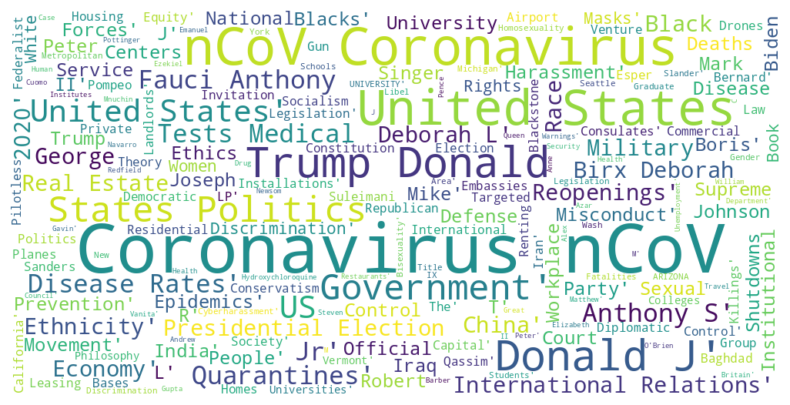

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [77]:
import re
from collections import Counter

# Tokenization: Split the text string into individual words using regex
tokens = re.findall(r'\b\w+\b', text.lower())

# Counting: Count the frequency of each unique word
word_freq = Counter(tokens)

# Sorting: Sort the words based on their frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

print(sorted_word_freq)

[('and', 38), ('coronavirus', 37), ('2019', 34), ('ncov', 34), ('united', 22), ('states', 22), ('j', 15), ('trump', 14), ('donald', 13), ('politics', 9), ('government', 8), ('of', 7), ('us', 6), ('s', 6), ('disease', 6), ('r', 5), ('l', 5), ('international', 4), ('relations', 4), ('2020', 4), ('jr', 4), ('fauci', 4), ('anthony', 4), ('tests', 4), ('medical', 4), ('quarantines', 4), ('rates', 4), ('military', 3), ('iraq', 3), ('control', 3), ('real', 3), ('estate', 3), ('presidential', 3), ('election', 3), ('discrimination', 3), ('university', 3), ('china', 3), ('birx', 3), ('deborah', 3), ('ii', 3), ('economy', 3), ('peter', 3), ('for', 3), ('movement', 3), ('black', 3), ('people', 3), ('race', 3), ('ethnicity', 3), ('reopenings', 3), ('george', 3), ('to', 3), ('defense', 2), ('forces', 2), ('mark', 2), ('t', 2), ('mike', 2), ('supreme', 2), ('court', 2), ('legislation', 2), ('party', 2), ('biden', 2), ('joseph', 2), ('sexual', 2), ('harassment', 2), ('state', 2), ('india', 2), ('epide